In [ ]:
# Building our own recommendation system for products on an e-commerce website like Amazon.com.

In [ ]:
# Loading Datasets 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1) Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [10]:
rcp = pd.read_csv("G:/R5 - Recommendation Systems/Ratings_Electronics.csv")

In [11]:
rcp.head(5)

,Userid,Productid,Ratings,Timestamp
0,A2CX7LUOHB2NDG,321732944,5,1341100800
1,A2NWSAGRHCP8N5,439886341,1,1367193600
2,A2WNBOD3WNDNKT,439886341,3,1374451200
3,A1GI0U4ZRJA8WN,439886341,1,1334707200
4,A1QGNMC6O1VW39,511189877,5,1397433600


In [15]:
rcp.drop('Timestamp', axis=1, inplace=True)

In [16]:
rcp.head(5)

,Userid,Productid,Ratings
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1
2,A2WNBOD3WNDNKT,439886341,3
3,A1GI0U4ZRJA8WN,439886341,1
4,A1QGNMC6O1VW39,511189877,5


In [17]:
rcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
Userid       1048575 non-null object
Productid    1048575 non-null object
Ratings      1048575 non-null int64
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [18]:
#Checking the number of rows and columns
rows,columns=rcp.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  1048575
Number of columns:  3


In [20]:
#Checking the datatypes
rcp.dtypes

Userid       object
Productid    object
Ratings       int64
dtype: object

In [22]:
#Summary statistics of rating variable
rcp['Ratings'].describe().transpose()

count    1.048575e+06
mean     3.973379e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Ratings, dtype: float64

In [24]:
# Handling Missing values

In [25]:
#Checking for missing values
print('Number of missing values across columns: \n',rcp.isnull().sum())

Number of missing values across columns: 
 Userid       0
Productid    0
Ratings      0
dtype: int64


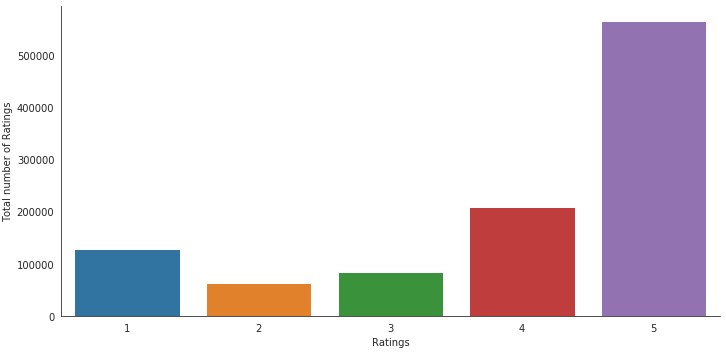

In [27]:
# Checking the distribution of the Rating
with sns.axes_style('white'):
    g = sns.factorplot("Ratings", data=rcp, aspect=2.0,kind='count')
    g.set_ylabels("Total number of Ratings")

In [ ]:
# From above fig we can infer that more users have give rating of 5

In [28]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', rcp['Userid'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', rcp['Productid'].nunique())

Number of unique users in Raw data =  786329
Number of unique product in Raw data =  61893


In [ ]:
# 2) Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [29]:
#Checking the top 10 users based on ratings
most_rated=rcp.groupby('Userid').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 Userid
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
AKT8TGIT6VVZ5     122
A11D1KHM7DVOQK    112
A2B7BUH8834Y6M    103
A3OXHLG6DIBRW8     95
A203OCQQ12MAVT     90
dtype: int64


In [30]:
counts=rcp.Userid.value_counts()
rcp_final=rcp[rcp.Userid.isin(counts[counts>=15].index)]
print('Number of users who have rated 25 or more items =', len(rcp_final))
print('Number of unique users in the final data = ', rcp_final['Userid'].nunique())
print('Number of unique products in the final data = ', rcp_final['Userid'].nunique())

Number of users who have rated 25 or more items = 20273
Number of unique users in the final data =  826
Number of unique products in the final data =  826


In [ ]:
RATING ANALYSIS IN FINAL DATASET

In [31]:
#constructing the pivot table
final_ratings_matrix = rcp_final.pivot(index = 'Userid', columns ='Productid', values = 'Ratings').fillna(0)
final_ratings_matrix.head()

Productid,1400501466,1400532620,1400532655,140053271X,1400599997,1400699169,1685560148,3744295508,7040034018,7562434166,...,B000IE1QOW,B000IE5XIC,B000IE8Z4Q,B000IELOY4,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF51UQ
Userid,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101OAAMZYWQ3U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A109LWN9DUGPDP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10C84Y38RT22P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Above table shows that it is a sparse matrix. So, many cells are filled with 0 values.

In [32]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (826, 10837)


In [33]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  20273
possible_num_of_ratings =  8951362
density: 0.23%


In [ ]:
#4.  Splitting the data

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(rcp_final, test_size = 0.3, random_state=0)
train_data.head()

,Userid,Productid,Ratings
709484,ABVYGB2TKBO8F,B000A7XSSY,5
872478,A34UVV757IKPVB,B000EPHR0C,4
317321,AEZJTA4KDIWY8,B0000AI0N1,4
525364,A3L9E0YI7C5G0W,B0002ZPJZY,2
72434,A3OXHLG6DIBRW8,B00004ZCJE,5


In [37]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (14191, 3)
Shape of testing data:  (6082, 3)


In [ ]:
#5. Building Popularity Recommder model

In [38]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('Productid').agg({'Userid': 'count'}).reset_index()
train_data_grouped.rename(columns = {'Userid': 'score'},inplace=True)
train_data_grouped.head(40)

,Productid,score
0,1400501466,1
1,1400532620,1
2,1400532655,1
3,140053271X,1
4,1400599997,1
5,1685560148,1
6,3744295508,1
7,7040034018,1
8,787988002X,1
9,9043413585,1


In [39]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('Productid').agg({'Userid': 'count'}).reset_index()
train_data_grouped.rename(columns = {'Userid': 'score'},inplace=True)
train_data_grouped.head(40)

,Productid,score
0,1400501466,1
1,1400532620,1
2,1400532655,1
3,140053271X,1
4,1400599997,1
5,1685560148,1
6,3744295508,1
7,7040034018,1
8,787988002X,1
9,9043413585,1


In [40]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'Productid'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,Productid,score,rank
2418,B00007E7JU,34,1.0
4874,B0002L5R78,29,2.0
2502,B00007KDVI,28,3.0
415,B00004SB92,27,4.0
809,B00004ZCJE,27,5.0


In [41]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['Userid'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [42]:
find_recom = [10,100,150]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the userId: 10

      Userid   Productid  score  rank
2418      10  B00007E7JU     34   1.0
4874      10  B0002L5R78     29   2.0
2502      10  B00007KDVI     28   3.0
415       10  B00004SB92     27   4.0
809       10  B00004ZCJE     27   5.0


The list of recommendations for the userId: 100

      Userid   Productid  score  rank
2418     100  B00007E7JU     34   1.0
4874     100  B0002L5R78     29   2.0
2502     100  B00007KDVI     28   3.0
415      100  B00004SB92     27   4.0
809      100  B00004ZCJE     27   5.0


The list of recommendations for the userId: 150

      Userid   Productid  score  rank
2418     150  B00007E7JU     34   1.0
4874     150  B0002L5R78     29   2.0
2502     150  B00007KDVI     28   3.0
415      150  B00004SB92     27   4.0
809      150  B00004ZCJE     27   5.0




In [ ]:
Since, it is a Popularity recommender model, so, all the three users are given the same recommendations. 
Here, we predict the products based on the popularity. It is not personalized to particular user. 
It is a non-personalized recommender system

In [ ]:
#6) . Build Collaborative Filtering model.

In [43]:
rcp_CF = pd.concat([train_data, test_data]).reset_index()
rcp_CF.head()

,index,Userid,Productid,Ratings
0,709484,ABVYGB2TKBO8F,B000A7XSSY,5
1,872478,A34UVV757IKPVB,B000EPHR0C,4
2,317321,AEZJTA4KDIWY8,B0000AI0N1,4
3,525364,A3L9E0YI7C5G0W,B0002ZPJZY,2
4,72434,A3OXHLG6DIBRW8,B00004ZCJE,5


In [ ]:
User Based Collaborative Filtering model

In [44]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = rcp_CF.pivot(index = 'Userid', columns ='Productid', values = 'Ratings').fillna(0)
pivot_df.head()

Productid,1400501466,1400532620,1400532655,140053271X,1400599997,1400699169,1685560148,3744295508,7040034018,7562434166,...,B000IE1QOW,B000IE5XIC,B000IE8Z4Q,B000IELOY4,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF51UQ
Userid,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101OAAMZYWQ3U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A109LWN9DUGPDP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10C84Y38RT22P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (826, 10837)


In [46]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

Productid,1400501466,1400532620,1400532655,140053271X,1400599997,1400699169,1685560148,3744295508,7040034018,7562434166,...,B000IE5XIC,B000IE8Z4Q,B000IELOY4,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF51UQ,user_index
Userid,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A101OAAMZYWQ3U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A109LWN9DUGPDP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10C84Y38RT22P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [47]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

Productid,1400501466,1400532620,1400532655,140053271X,1400599997,1400699169,1685560148,3744295508,7040034018,7562434166,...,B000IE1QOW,B000IE5XIC,B000IE8Z4Q,B000IELOY4,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF51UQ
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Singular Value Decomposition

In [48]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

In [49]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[-0.00918079 -0.01780918  0.01132164 ... -0.00323169  0.00302847
   0.00194504]
 [-0.03999968  0.01455003  0.00368184 ... -0.00111863  0.00028347
   0.00148187]
 [-0.00810236 -0.02503221  0.00864981 ... -0.00207449  0.00203885
   0.001114  ]
 ...
 [-0.00117251  0.00385194 -0.00757343 ... -0.00261558  0.00046635
   0.00463089]
 [-0.00112604 -0.03053506  0.01374713 ... -0.0019187   0.0019775
   0.00111434]
 [-0.00266271 -0.00020686 -0.00051965 ... -0.00055298 -0.00043119
   0.00316386]]


In [50]:
print('Sigma: \n',sigma)

Sigma: 
 [44.33402393 44.93101444 46.59713311 47.17201884 51.8570262  53.94098246
 61.61506395 63.73655796 70.43170757 85.79267313]


In [ ]:
As sigma is not a diagonal matrix we have to convert it into diagonal matrix.

In [51]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[44.33402393  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         44.93101444  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         46.59713311  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         47.17201884  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         51.8570262   0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         53.94098246
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  61.61506395  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         63.73655796  0.          0.        ]
 [ 0.          0.          0.        

In [52]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

Productid,1400501466,1400532620,1400532655,140053271X,1400599997,1400699169,1685560148,3744295508,7040034018,7562434166,...,B000IE1QOW,B000IE5XIC,B000IE8Z4Q,B000IELOY4,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF51UQ
0,1.033566e-04,0.000196,0.010682,0.001068,0.000604,0.003362,0.003220,0.001325,0.002132,0.000864,...,0.001490,0.032329,0.032955,0.002169,0.006414,0.000905,0.000911,0.004473,0.018053,0.016735
1,1.585280e-04,0.000120,0.001124,-0.000094,0.000521,0.004590,0.003942,0.000246,0.001089,-0.000053,...,0.000830,0.006886,-0.005137,0.000788,0.005207,0.001635,0.000212,-0.001899,-0.006773,0.000288
2,7.043800e-05,0.000186,0.009954,0.000723,0.000412,0.002251,0.001451,0.000533,0.001955,0.000579,...,0.001178,0.028963,0.017851,0.001571,0.002744,0.000581,0.000379,0.003371,0.000321,0.013633
3,-1.980098e-07,-0.000004,0.007344,0.000677,0.000125,-0.000023,-0.000059,0.000503,0.000555,-0.000004,...,0.000233,-0.002529,-0.003780,0.001019,-0.000916,0.000029,-0.000130,-0.000119,-0.000794,0.001876
4,3.675051e-06,0.000002,0.002346,0.000420,0.000151,0.000058,0.000068,0.000250,0.000228,0.000033,...,0.000332,0.000234,0.001100,0.000418,0.000303,0.000043,0.000023,0.000280,0.001353,0.001775


In [53]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [54]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B000EEQ83K                  0.0          0.075712
B000065BPC                  0.0          0.074832
B000BKJZ9Q                  0.0          0.068016
B000BQ57BU                  0.0          0.067492
B00005NIMR                  0.0          0.060583


In [55]:
userID = 6
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
B0002L5R78                  0.0          0.063154
B00004ZCJE                  0.0          0.051276
B00004Z5M1                  0.0          0.039968
B00081A2KY                  0.0          0.031879
B000067VBL                  0.0          0.031481


In [56]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
B0002L5R78                  0.0          0.281621
B00004ZCJE                  0.0          0.194986
B00004Z5M1                  0.0          0.162415
B00007E7JU                  0.0          0.133486
B0000BVYTV                  0.0          0.131222


In [ ]:
Since, it is a Collaborative recommender model, 
so, all the three users are given different recommendations based on users past behaviour.

In [ ]:
#7. Evaluation of Collabrative recommendation model

In [57]:
# Actual ratings given by the users
final_ratings_matrix.head()

Productid,1400501466,1400532620,1400532655,140053271X,1400599997,1400699169,1685560148,3744295508,7040034018,7562434166,...,B000IE1QOW,B000IE5XIC,B000IE8Z4Q,B000IELOY4,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF51UQ
Userid,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101OAAMZYWQ3U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A109LWN9DUGPDP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10C84Y38RT22P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

Productid
1400501466    0.001211
1400532620    0.001211
1400532655    0.016949
140053271X    0.006053
1400599997    0.001211
dtype: float64

In [60]:
# Predicted ratings 
preds_df.head()

Productid,1400501466,1400532620,1400532655,140053271X,1400599997,1400699169,1685560148,3744295508,7040034018,7562434166,...,B000IE1QOW,B000IE5XIC,B000IE8Z4Q,B000IELOY4,B000IEVASY,B000IEY9GO,B000IF21QI,B000IF2EHE,B000IF4788,B000IF51UQ
0,1.033566e-04,0.000196,0.010682,0.001068,0.000604,0.003362,0.003220,0.001325,0.002132,0.000864,...,0.001490,0.032329,0.032955,0.002169,0.006414,0.000905,0.000911,0.004473,0.018053,0.016735
1,1.585280e-04,0.000120,0.001124,-0.000094,0.000521,0.004590,0.003942,0.000246,0.001089,-0.000053,...,0.000830,0.006886,-0.005137,0.000788,0.005207,0.001635,0.000212,-0.001899,-0.006773,0.000288
2,7.043800e-05,0.000186,0.009954,0.000723,0.000412,0.002251,0.001451,0.000533,0.001955,0.000579,...,0.001178,0.028963,0.017851,0.001571,0.002744,0.000581,0.000379,0.003371,0.000321,0.013633
3,-1.980098e-07,-0.000004,0.007344,0.000677,0.000125,-0.000023,-0.000059,0.000503,0.000555,-0.000004,...,0.000233,-0.002529,-0.003780,0.001019,-0.000916,0.000029,-0.000130,-0.000119,-0.000794,0.001876
4,3.675051e-06,0.000002,0.002346,0.000420,0.000151,0.000058,0.000068,0.000250,0.000228,0.000033,...,0.000332,0.000234,0.001100,0.000418,0.000303,0.000043,0.000023,0.000280,0.001353,0.001775


In [61]:
# Average PREDICTED rating for each item
preds_df.mean().head()

Productid
1400501466    0.000058
1400532620    0.000078
1400532655    0.007409
140053271X    0.000773
1400599997    0.000428
dtype: float64

In [62]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(10837, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
Productid,,,
1400501466,0.001211,0.000058,0
1400532620,0.001211,0.000078,1
1400532655,0.016949,0.007409,2
140053271X,0.006053,0.000773,3
1400599997,0.001211,0.000428,4


In [63]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00731 



In [ ]:
#8. Getting top - K ( K = 5) recommendations.

In [66]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 9
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 9):

                   user_ratings  user_predictions
Recommended Items                                
B00007KDVI                  0.0          0.096690
B00004SB92                  0.0          0.094044
B00006B7HB                  0.0          0.075153
B00008OE6I                  0.0          0.074425
B00004VWM3                  0.0          0.073117


In [ ]:
#9. Summarise your insights.

In [ ]:
a)The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, 
which may be not suitable to the user.We can see the differance above for the user id 4, 6 & 8, 
The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.

b) Model-based Collaborative Filtering is a personalised recommender system, 
the recommendations are based on the past behavior of the user and it is not dependent on any additional information.